### **Business Content**

Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attribute of customers can be crucial in making business decisions. Hence, knowing how to explore and generate value out of such data can be an invaluable skill to have.

Suppose you are hired as a Data Scientist in an Insurance company. The company wants to have a detailed understanding of the customer base for one of its Insurance Policies 'MediClaim'. The idea is to generate insights about the customers and answer a few key questions with statistical evidence, by using the past dataset. The dataset 'Axisinsurance' contains customer's details like age, sex, charges,etc. Perform the statistical analysis to answer the following questions using the collected data.

### **Objective**

Statistical Analysis of Business Data. Explore the dataset and extract insights from the data. The idea is for you to get comfortable with doing statistical analysis in Python.

You are expected. to do the following:



1.   Explore the dataset and extract insights using Exploratory Data Analysis.
2.   Prove (or disprove) that the medical claims made by the people who smoke are greater than those who don't.


3.   Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4.   Does the smoking habit of customers depend on their region? [Hint: Create a contigency table using the pandas.crosstab() function].


5.   Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

* Consider a significance Level of 0.05 for all tests.







### **Data Description**

1. **Age** - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years since they are generally covered by the government).
2. **Sex** - This is the policyholder's gender, either male and female.
3. **BMI** - This is the body mass index (BMI), which provides a sense of how over or underweight a personis relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. **Children** - This is an integer indicating the number of children/dependents covered by the insurance plan.
5. **Smoker** - This is YES or NO depending on whether the insured regularly smoked tabacco.
6. **Region** - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast,southwest, or northwest.
7. **Charges** - Individual medical costs billed to health insurance.

###  **Importing the Libraries to Perform the Analysis.**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Library to help with statistical analysis
import scipy.stats as stats

In [3]:
# Read the dataset by using pandas.
df = pd.read_csv('/content/drive/MyDrive/Datasets/AxisInsurance (1).csv')

In [4]:
# View the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,21,female,16.000,1,no,northeast,3167.45585
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# View the shape of the dataset
df.shape

(1338, 7)

In [7]:
# View the information about the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


=> There is no null value in the dataset.

In [8]:
# Get the summary of the dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.682687,1.094918,13270.422265
std,14.049960,6.145674,1.205493,12110.011237
min,18.000000,14.000000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Univariate Analysis**

###**Age Distribution**

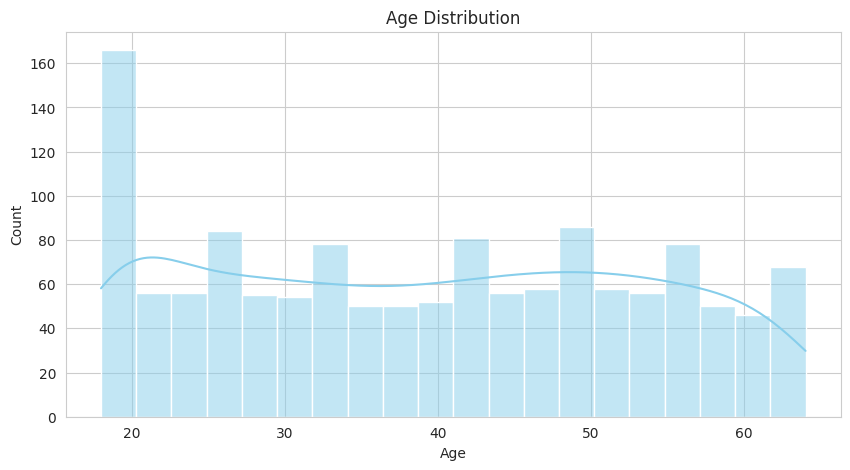

In [19]:
# Set the style for plots
sns.set_style("whitegrid")

# Set Figure Size for Plot
plt.figure(figsize=(10,5))

# Histogram For Age Distribution
sns.histplot(df['age'], bins = 20, kde = True, color="skyblue")
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

The dataset consists of individuals primarily between the ages of 18 to 64, with a relatively even spread.


###**BMI Distribution**

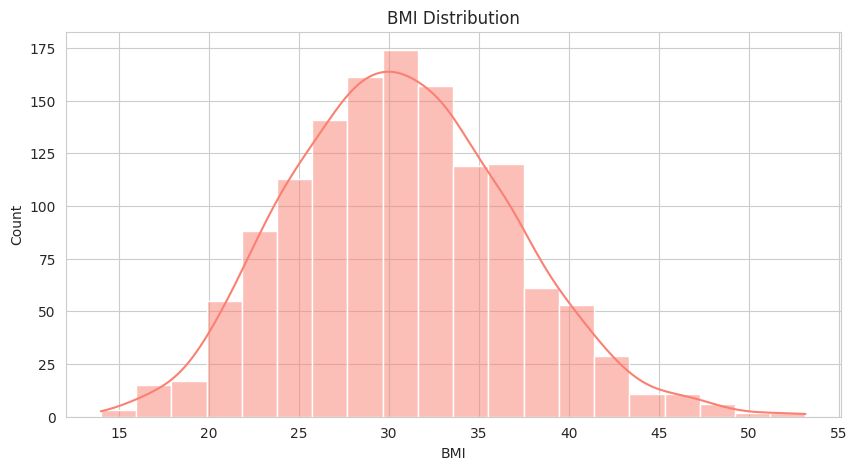

In [21]:
# Set Figure Size For Plot
plt.figure(figsize=(10,5))

# Histogram for BMI Distribution
sns.histplot(df['bmi'], bins = 20, kde = True, color = "salmon")
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

Most individuals have a BMI between 18.5 to 40, with some extreme values indicating obesity.

###**Medical Charges**

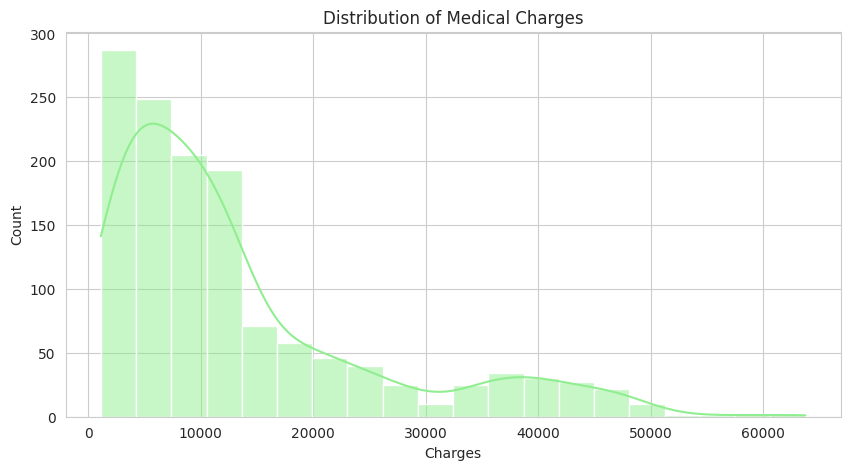

In [24]:
# Set the Figure Size For Plot
plt.figure(figsize=(10,5))

# Histogram for Medical Charges
sns.histplot(df['charges'], bins = 20, kde = True, color = "lightgreen")
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges')
plt.ylabel('Count')
plt.show()

The distribution is right-skewed, meaning a small number of individuals incur extremely high medical costs.


###**Gender Distribution**

<ipython-input-23-f36e25dcc2ca>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data = df, palette = 'pastel')


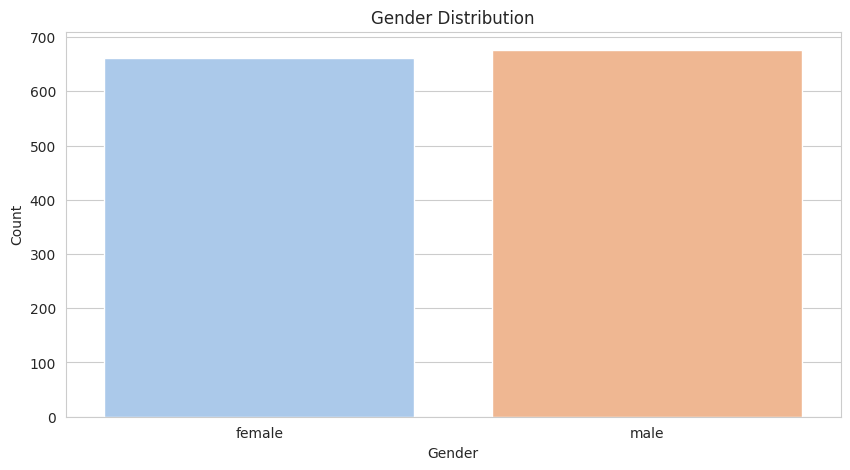

In [23]:
# Set the Figure Size For Plot
plt.figure(figsize=(10,5))

# CountPlot for Gender Distribution
sns.countplot(x='sex', data = df, palette = 'pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

The dataset contains a roughly equal number of males and females.


###**CountPlot for Smoker**

<ipython-input-25-ab8f7da1e823>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'smoker', data = df, palette = ['salmon', 'lightgreen'])


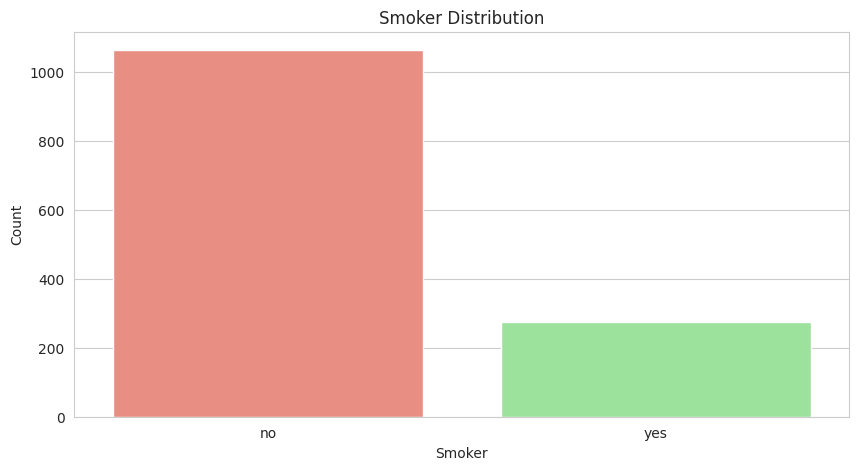

In [25]:
# Set the Figure Size For Plot
plt.figure(figsize=(10,5))

# CountPlot for Smoker
sns.countplot(x = 'smoker', data = df, palette = ['salmon', 'lightgreen'])
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()

There are significantly more non-smokers than smokers.


###**Region Distribution**

<ipython-input-26-f3828b58a646>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'region', data = df, palette = 'pastel', order = df['region'].value_counts().index)


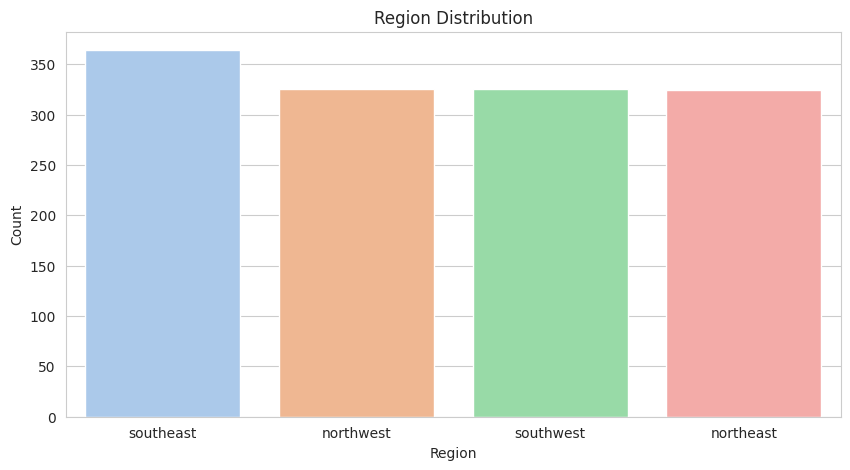

In [26]:
# # Set the Figure Size For Plot
plt.figure(figsize=(10,5))

# Countplot for Region Distribution
sns.countplot(x = 'region', data = df, palette = 'pastel', order = df['region'].value_counts().index)
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

he policyholders are fairly evenly distributed across the four regions.

### **Bivariate Analysis**

###**Medical Charges by Smoking Status**

<ipython-input-27-5b36fec20fd7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, palette = ['salmon', 'lightgreen'])


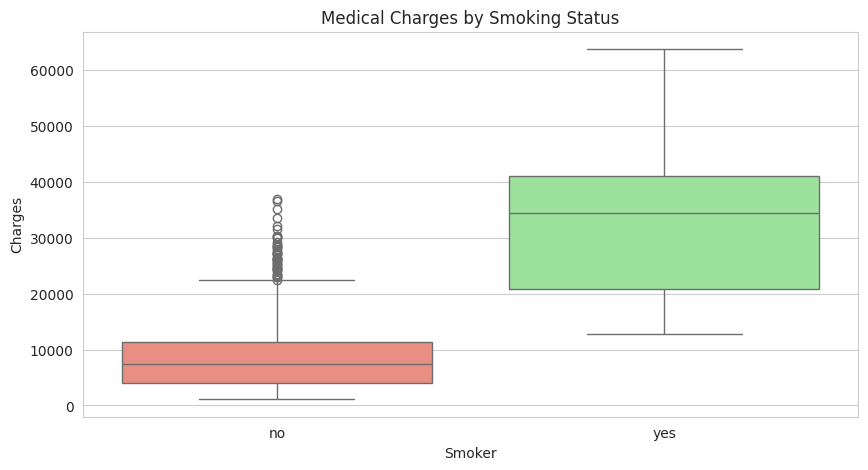

In [27]:
# Boxplot for Medical Charges by Smoking Status
plt.figure(figsize=(10,5))
sns.boxplot(x='smoker', y='charges', data=df, palette = ['salmon', 'lightgreen'])
plt.title('Medical Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()

1. Smokers have significantly higher median charges, with many outliers in the high-cost range.
2. This suggests that smoking is a major contributor to increased medical expenses.

###**BMI by Gender**

<ipython-input-30-d9844a6250af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'sex', y = 'bmi', data = df, palette = ['lightcoral', 'lightgreen'])


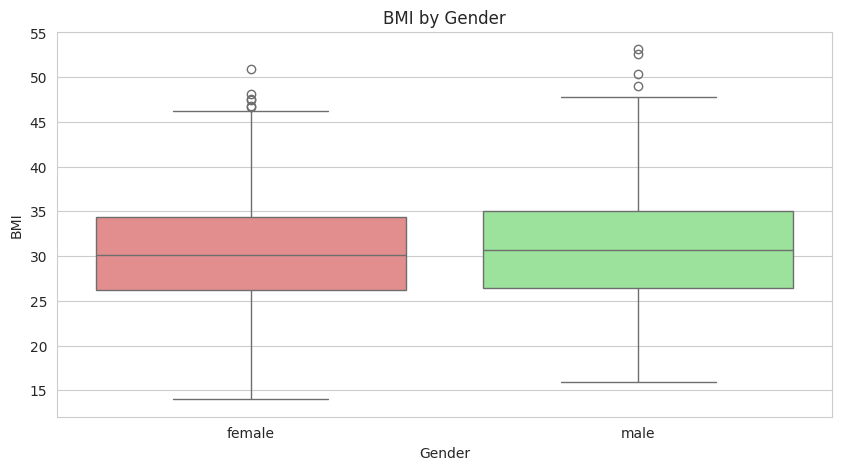

In [30]:
# Boxplot for BMI by Gender
plt.figure(figsize=(10,5))
sns.boxplot(x = 'sex', y = 'bmi', data = df, palette = ['lightcoral', 'lightgreen'])
plt.title('BMI by Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()

The BMI distribution for males and females appears similar, with a slight tendency for males to have higher BMIs.

###**BMI among Women By Number of Children**

<ipython-input-31-5a06ce88f50f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'children', y = 'bmi', data = df[df['sex'] == 'female'], palette= 'pastel')


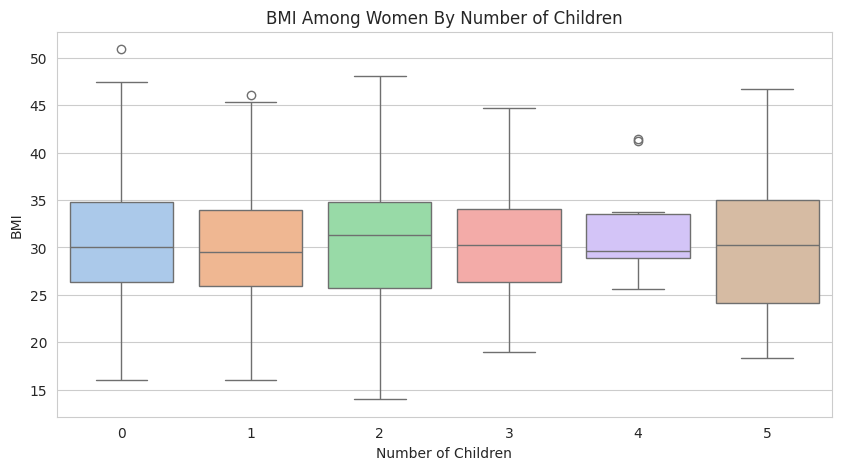

In [31]:
# Boxplot for BMI among Women By Number of Children
plt.figure(figsize=(10,5))
sns.boxplot(x = 'children', y = 'bmi', data = df[df['sex'] == 'female'], palette= 'pastel')
plt.title('BMI Among Women By Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('BMI')
plt.show()

he BMI values appear fairly consistent regardless of the number of children, suggesting no strong relationship.

### **Do Smokers Have Higher Medical Claims?**
##**Hypotheses**

**Null Hypothesis (H₀)**: The average medical charges for smokers and non-smokers are the same.

**Alternative Hypothesis (H₁)**: Smokers have significantly higher medical charges than non-smokers.

**Independent t-test** (Welch's t-test) is used to compare the means of two independent groups with unequal variances.


In [32]:
# Importing ttest_ind to perfom the Hypothese
from scipy.stats import ttest_ind

# Extract medical charges for smokers and non-smokers
charges_smokers = df[df['smoker'] == 'yes']['charges']
charges_non_smokers = df[df['smoker'] == 'no']['charges']

# Perform Independent t-test for Medical Charges
t_stat,p_value = ttest_ind(charges_smokers, charges_non_smokers, equal_var= False)

# Display Results
t_stat,p_value

(32.751887766341824, 5.88946444671698e-103)

1. **t-statistic** = 32.75 (a very large difference between groups).

2. **p-value** ≈ 0 (far below 0.05).

3. **Conclusion**: Reject the null hypothesis → Smokers have significantly higher medical charges than non-smokers.


### **Is There a Difference in BMI Between Males and Females?**

## **Hypotheses**

**Null Hypothesis (H₀)**: The average BMI of males and females is the same.

**Alternative Hypothesis (H₁)**: The average BMI of males and females is different.

**Independent t-test** is used to compare the mean BMI of males and females.

In [34]:
# Importing ttest_ind to perform Hypotheses
from scipy.stats import ttest_ind

# Extract BMI for Gender
bmi_males = df[df['sex'] == 'male']['bmi']
bmi_females = df[df['sex'] == 'female']['bmi']

# Perform Independent t-test for BMI of males and females
t_stat,p_value = ttest_ind(bmi_males, bmi_females, equal_var = False)

# Display Results
t_stat,p_value

(1.5672822877610648, 0.11728564127728781)

1. **t-statistic** = 1.57, indicating a small difference.

2. **p-value** = 0.117, which is greater than 0.05.

3. **Conclusion: Fail to reject the null hypothesis** → There is no **significant difference** in BMI between males and females.

### **Does Smoking Depend on Region?**
## **Hypotheses**

**Null Hypothesis (H₀)**: Smoking habits are independent of region.

**Alternative Hypothesis (H₁)** : Smoking habits depend on region.

**Chi-square test** is used to check for independence between categorical variables.


In [35]:
# Importing chi2_contingency from scipy.stats to Perform Chi-Square test
from scipy.stats import chi2_contingency


# Creating a Contingency table for Smoking v/s Region
contingency_table = pd.crosstab(df['smoker'], df['region'])

# Perform Chi-Square test
chi2_stat,p_value_chi, dof, expected = chi2_contingency(contingency_table)

# Display Results
chi2_stat,p_value_chi, dof, expected

(7.34347776140707,
 0.06171954839170547,
 3,
 array([[257.65022422, 258.44544096, 289.45889387, 258.44544096],
        [ 66.34977578,  66.55455904,  74.54110613,  66.55455904]]))

1. **Chi-square statistic = 7.34**, indicating some variation.

2. **p-value** = 0.061, which is slightly above 0.05.

3. **Conclusion: Fail to reject the null hypothesis** → **Smoking habits do not significantly depend on region** at a 5% significance level.

### **Is the Mean BMI of Women with 0, 1, and 2 Children the Same?**

## **Hypotheses**

**Null Hypothesis (H₀)**: The mean BMI is the same across women with different numbers of children.

**Alternative Hypothesis (H₁)**: At least one group has a significantly different mean BMI.

**ANOVA test** is used to compare more than two groups.

In [36]:
#Importing f_oneway From scipy.stat to Perform ANOVA test (Since we compare more than two groups)
from scipy.stats import f_oneway

# Extract BMI data for women with 0, 1, and 2 children
bmi_0_children = df[(df['sex'] == 'female') & (df['children'] == 0)]['bmi']
bmi_1_child = df[(df['sex'] == 'female') & (df['children'] == 1)]['bmi']
bmi_2_children = df[(df['sex'] == 'female') & (df['children'] == 2)]['bmi']

# Perform one-way ANOVA
f_stat_bmi, p_value_bmi_anova = f_oneway(bmi_0_children, bmi_1_child, bmi_2_children)

# Display results
f_stat_bmi, p_value_bmi_anova

(0.3286778001560304, 0.7200129592186635)

1. **F-statistic = 0.33**, indicating minimal variation.

2. **p-value = 0.72**, which is far greater than 0.05.

3. **Conclusion: Fail to reject the null hypothesis** **→ The mean BMI of women with different numbers of children is not significantly different.**

### **Final Business Insights & Recommendations**
1. **Smoking is a significant cost factor**

 => Smokers have much **higher medical expenses** than non-smokers.

 => **Recommendation**: The company could implement higher premiums for smokers or incentivize quitting programs.

2. **BMI is similar between genders**

 => No significant BMI difference between males and females.

 => **Recommendation**: Gender-based BMI policies may not be needed.

3. **Smoking habits are independent of region**

 => No region shows a significantly different smoking rate.

 => **Recommendation**: Regional smoking behavior does not need special consideration in insurance pricing.

4. **Number of children does not affect BMI for women**

 => Having 0, 1, or 2 children does not impact BMI.

 => **Recommendation**: Child count should not be factored into BMI-based policy adjustments.